In [1]:
import pandas as pd
import numpy as np

In [13]:
distill = pd.read_csv('06_cv_bm_train_distill_models.csv')
train = pd.read_csv('07_cv_train_models.csv')

In [14]:
drop_cols = ['subsample_frac', 'seed', 'save_dir', 'binary_mapper_frac', 'gpu', 'use_cache', 'cat_mappings', 'task_type', 'save_dir_unique', 'n_epochs',
             'size_interactions', 'post_max_features', 'post_interaction', 'pre_max_features', 'pre_interaction', 'binary_mapper_bit']

In [15]:
distill = distill.drop(columns = drop_cols)
train = train.drop(columns = drop_cols)

In [16]:
models = distill.copy().drop(columns=['distiller_kfold_val_r2','distiller_avg_kfold_val_r2', 'distiller_r2_score_train_true', 'distiller_r2_score_val_true', 
                                          'distiller_r2_score_train_teacher', 'distiller_r2_score_val_teacher', 'distiller_name'])
models = models.rename(columns={'teacher_avg_kfold_val_r2': 'avg_kfold_val_r2', 'teacher_kfold_val_r2':'kfold_val_r2', 
                                        'teacher_r2_score_train_true':'train_r2', 'teacher_r2_score_val_true':'val_r2'})
models.loc[:, 'distiller_name'] = 'None'

In [17]:
distillers = distill.copy().drop(columns=['teacher_kfold_val_r2','teacher_avg_kfold_val_r2', 'teacher_r2_score_train_true', 'teacher_r2_score_val_true', 
                                          'distiller_r2_score_train_teacher', 'distiller_r2_score_val_teacher'])
distillers = distillers.rename(columns={'distiller_avg_kfold_val_r2': 'avg_kfold_val_r2', 'distiller_kfold_val_r2':'kfold_val_r2', 
                                        'distiller_r2_score_train_true':'train_r2', 'distiller_r2_score_val_true':'val_r2'})

In [18]:
train = train.rename(columns={'teacher_avg_kfold_val_r2': 'avg_kfold_val_r2', 'teacher_kfold_val_r2':'kfold_val_r2', 
                                        'teacher_r2_score_train_true':'train_r2', 'teacher_r2_score_val_true':'val_r2'})
train.loc[:, 'distiller_name'] = 'None'

In [19]:
results = pd.concat([distillers, models, train], axis = 0)
results

,dataset_name,model_name,distiller_name,binary_mapper_name,binary_mapper_depth,max_depth,max_features,max_rules,max_trees,avg_kfold_val_r2,kfold_val_r2,train_r2,val_r2
0,miami_housing,rf_plus,figs,gmm_binary_mapper,2,5,1.00,60,30,0.783519,"[0.7935936177324846, 0.7785769234546562, 0.778...",0.800242,0.751060
1,concrete,rf_plus,ft_distill,dt_binary_mapper,2,4,1.00,60,30,0.652333,"[0.6697959203802811, 0.6426053134667642, 0.644...",0.763106,0.773645
2,cpu_act,random_forest,figs,dt_binary_mapper,3,4,1.00,60,30,0.882486,"[0.8495969381096802, 0.9185654694145868, 0.879...",0.910823,0.900083
3,ca_housing,rf_plus,figs,gmm_binary_mapper,2,5,1.00,60,30,0.602343,"[0.5933728428069511, 0.5996862980375848, 0.613...",0.609230,0.603426
4,abalone,random_forest,ft_distill,dt_binary_mapper,3,4,0.75,60,30,0.367042,"[0.3254923381490056, 0.3665016957980639, 0.409...",0.411421,0.391950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,concrete,ft_distill,None,dt_binary_mapper,2,4,1.00,60,30,0.690408,"[0.66771793385508, 0.6577942685690668, 0.74571...",0.786607,0.811876
86,abalone,ft_distill,None,dt_binary_mapper,2,4,1.00,60,30,0.372679,"[0.3554607402091743, 0.3566562682983969, 0.405...",0.407586,0.375404
87,cpu_act,ft_distill,None,dt_binary_mapper,2,4,1.00,60,30,0.939112,"[0.9208508900026702, 0.9537978876394451, 0.942...",0.959264,0.948353
88,airfoil,ft_distill,None,gmm_binary_mapper,2,4,1.00,60,30,0.549698,"[0.5054820310749297, 0.6383697344246079, 0.505...",0.700653,0.643415


In [76]:
m_h = results[results['dataset_name'] == 'miami_housing'].groupby(['model_name', 'distiller_name', 'binary_mapper_name']).apply(lambda sdf: sdf.sort_values(by='val_r2', ascending=False).iloc[0,:])#.reset_index()

In [77]:
m_h

dataset_name  \
model_name     distiller_name binary_mapper_name                  
figs           None           dt_binary_mapper    miami_housing   
                              gmm_binary_mapper   miami_housing   
                              no_binary_mapper    miami_housing   
               figs           dt_binary_mapper    miami_housing   
                              gmm_binary_mapper   miami_housing   
               ft_distill     dt_binary_mapper    miami_housing   
                              gmm_binary_mapper   miami_housing   
ft_distill     None           gmm_binary_mapper   miami_housing   
ft_transformer None           dt_binary_mapper    miami_housing   
                              gmm_binary_mapper   miami_housing   
               figs           dt_binary_mapper    miami_housing   
                              gmm_binary_mapper   miami_housing   
               ft_distill     dt_binary_mapper    miami_housing   
                              gmm_binary_mapper   miami_housing   
random_forest  None           dt_binary_mapper    miami_housing   
                              gmm_binary_mapper   miami_housing   
               figs           dt_binary_mapper    miami_housing   
                              gmm_binary_mapper   miami_housing   
               ft_distill     dt_binary_mapper    miami_housing   
                              gmm_binary_mapper   miami_housing   
resnet         None           dt_binary_mapper    miami_housing   
                              gmm_binary_mapper   miami_housing   
               figs           dt_binary_mapper    miami_housing   
                              gmm_binary_mapper   miami_housing   
               ft_distill     dt_binary_mapper    miami_housing   
                              gmm_binary_mapper   miami_housing   
rf_plus        None           dt_binary_mapper    miami_housing   
                              gmm_binary_mapper   miami_housing   
               figs           dt_binary_mapper    miami_housing   
                              gmm_binary_mapper   miami_housing   
               ft_distill     dt_binary_mapper    miami_housing   
                              gmm_binary_mapper   miami_housing   
xgboost        None           dt_binary_mapper    miami_housing   
                              gmm_binary_mapper   miami_housing   
                              no_binary_mapper    miami_housing   
               figs           dt_binary_mapper    miami_housing   
                              gmm_binary_mapper   miami_housing   
               ft_distill     dt_binary_mapper    miami_housing   
                              gmm_binary_mapper   miami_housing   

                                                      model_name  \
model_name     distiller_name binary_mapper_name                   
figs           None           dt_binary_mapper              figs   
                              gmm_binary_mapper             figs   
                              no_binary_mapper              figs   
               figs           dt_binary_mapper              figs   
                              gmm_binary_mapper             figs   
               ft_distill     dt_binary_mapper              figs   
                              gmm_binary_mapper             figs   
ft_distill     None           gmm_binary_mapper       ft_distill   
ft_transformer None           dt_binary_mapper    ft_transformer   
                              gmm_binary_mapper   ft_transformer   
               figs           dt_binary_mapper    ft_transformer   
                              gmm_binary_mapper   ft_transformer   
               ft_distill     dt_binary_mapper    ft_transformer   
                              gmm_binary_mapper   ft_transformer   
random_forest  None           dt_binary_mapper     random_forest   
                              gmm_binary_mapper    random_forest   
               figs           dt_binary_mapper     random_forest   
           

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_histogram_for_dataset(df, dataset_name):
    # Set the aesthetics for the plots
    sns.set_context("talk", font_scale=5)
    sns.set(style="whitegrid")

    # Create a catplot for model_name and distiller_name
    g = sns.catplot(
        data=df,
        x='model_name',
        y='val_r2',
        hue=df[['distiller_name', 'binary_mapper_name']].apply(tuple, axis =1),
        kind='bar',
        height=6,
        aspect=2
    )
    
    # Set the title and labels
    g.fig.suptitle(f'Validation R2 Scores by Model and Distiller ({dataset_name})', fontsize=16)
    g.set_axis_labels("Model Name", "Validation R2 Score")
    g._legend.set_title('Distiller Name')
    sns.move_legend(g, bbox_to_anchor=(1.04,1), loc="upper left", markerscale=5, title="distiller")
    
    # Adjust the layout
    plt.xticks(rotation=45)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


ValueError: number of labels (2) does not match number of bars (7).

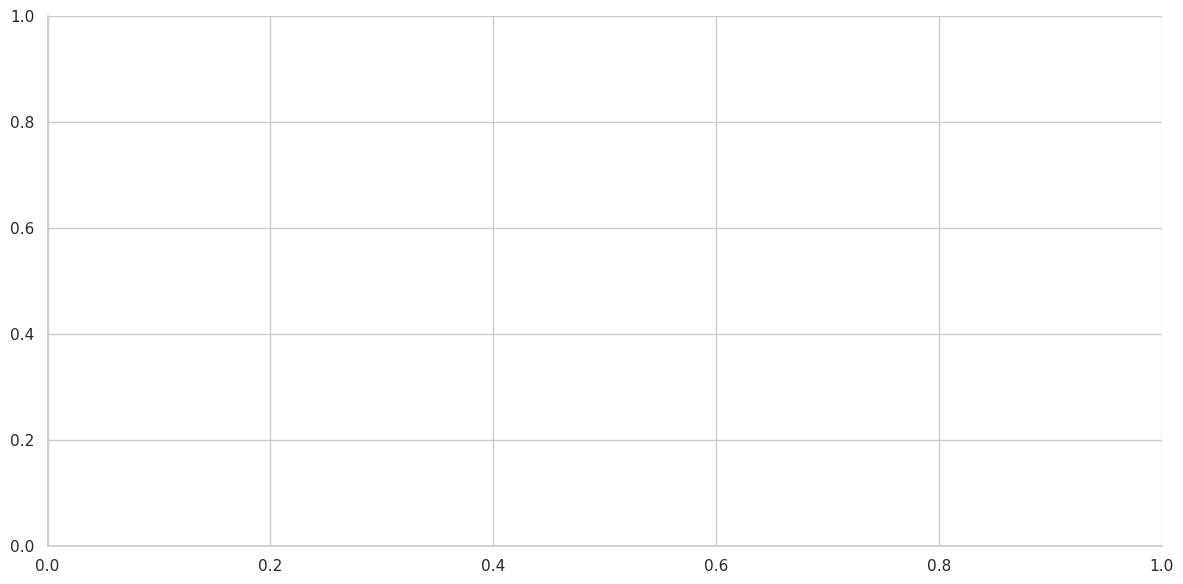

In [82]:
for dn in results['dataset_name'].unique():
    cur_df = m_h = results[results['dataset_name'] == dn].groupby(['model_name', 'distiller_name', 'binary_mapper_name']).apply(lambda sdf: sdf.sort_values(by='val_r2', ascending=False).iloc[0,:])#.reset_index()
    plot_histogram_for_dataset(m_h, dn)